<a href="https://colab.research.google.com/github/abubogale342/final_project/blob/master/thesis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
ratings = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ratings.csv')

In [3]:
ratings.size

5157325

In [4]:
len(ratings.user_id.unique()), len(ratings.meal_id.unique()), len(ratings.hotel_id.unique())

(27694, 362, 4)

In [0]:
ratings.user_id = ratings.user_id.astype('category').cat.codes.values
ratings.meal_id = ratings.meal_id.astype('category').cat.codes.values
ratings.hotel_id = ratings.hotel_id.astype('category').cat.codes.values

In [6]:
ratings.head()

,Unnamed: 0,user_id,meal_id,rating,hotel_id
0,0,0,253,5,2
1,1,1,255,5,2
2,2,1,25,4,0
3,3,1,307,3,3
4,4,1,32,4,0


In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings, test_size=0.2)

In [8]:
train.head()

,Unnamed: 0,user_id,meal_id,rating,hotel_id
429841,429841,13617,70,5,0
223745,223745,8606,134,5,1
137855,137855,6505,259,3,2
507046,507046,15532,117,4,1
1018227,1018227,27426,69,4,0


In [0]:
test.head()
y_true = test.rating

In [10]:
import keras
n_latent_factors_user = 24
n_latent_factors_meal = 10
n_latent_factors_hotel = 4
n_latent_factors_mf = 3
n_users, n_meals, n_hotels = len(ratings.user_id.unique()), len(ratings.meal_id.unique()), len(ratings.hotel_id.unique())

Using TensorFlow backend.


In [11]:
user_input = keras.layers.Input(shape=[1],name='user')
user_embedding_mlp = keras.layers.Embedding(n_users + 1, n_latent_factors_user, name='user-Embedding-MLP')(user_input)
user_vec_mlp = keras.layers.Flatten(name='FlattenUsers-MLP')(user_embedding_mlp)
user_vec_mlp = keras.layers.Dropout(0.2)(user_vec_mlp)

user_embedding_mf = keras.layers.Embedding(n_users + 1, n_latent_factors_mf, name='user-Embedding-MF')(user_input)
user_vec_mf = keras.layers.Flatten(name='FlattenUsers-MF')(user_embedding_mf)
user_vec_mf = keras.layers.Dropout(0.2)(user_vec_mf)

W0701 23:31:21.396380 139732325050240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 23:31:21.463874 139732325050240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0701 23:31:21.503048 139732325050240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0701 23:31:21.504619 139732325050240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0701 23:31:21.519992 

In [0]:
meal_input = keras.layers.Input(shape=[1],name='meal')
meal_embedding_mlp = keras.layers.Embedding(n_meals + 1, n_latent_factors_meal, name='meal-Embedding-MLP')(meal_input)
meal_vec_mlp = keras.layers.Flatten(name='FlattenMeal-MLP')(meal_embedding_mlp)
meal_vec_mlp = keras.layers.Dropout(0.2)(meal_vec_mlp)

meal_embedding_mf = keras.layers.Embedding(n_meals + 1, n_latent_factors_mf, name='meal-Embedding-MF')(meal_input)
meal_vec_mf = keras.layers.Flatten(name='FlattenMeal-MF')(meal_embedding_mf)
meal_vec_mf = keras.layers.Dropout(0.2)(meal_vec_mf)

In [0]:
hotel_input = keras.layers.Input(shape=[1],name='hotel')
hotel_embedding_mlp = keras.layers.Embedding(n_hotels + 1, n_latent_factors_hotel, name='hotel-Embedding-MLP')(hotel_input)
hotel_vec_mlp = keras.layers.Flatten(name='FlattenHotels-MLP')(hotel_embedding_mlp)
hotel_vec_mlp = keras.layers.Dropout(0.2)(hotel_vec_mlp)

hotel_embedding_mf = keras.layers.Embedding(n_hotels + 1, n_latent_factors_mf, name='hotel-Embedding-MF')(hotel_input)
hotel_vec_mf = keras.layers.Flatten(name='FlattenHotels-MF')(hotel_embedding_mf)
hotel_vec_mf = keras.layers.Dropout(0.2)(hotel_vec_mf)

In [0]:
concat = keras.layers.merge.Concatenate(name='concat')([user_vec_mlp,meal_vec_mlp,hotel_vec_mlp])
pred_mf = keras.layers.merge.Multiply(name='mul')([user_vec_mf,meal_vec_mf,hotel_vec_mf])

In [0]:
concat_dropout = keras.layers.Dropout(0.2)(concat)

In [0]:
dense = keras.layers.Dense(200,name='FullyConnected')(concat_dropout)
dense_batch = keras.layers.BatchNormalization(name='Batch')(dense)
dropout_1 = keras.layers.Dropout(0.2,name='Dropout-1')(dense_batch)
dense_2 = keras.layers.Dense(100,name='FullyConnected-1')(dropout_1)
dense_batch_2 = keras.layers.BatchNormalization(name='Batch-2')(dense_2)
dropout_2 = keras.layers.Dropout(0.2,name='Dropout-2')(dense_batch_2)
dense_3 = keras.layers.Dense(50,name='FullyConnected-2')(dropout_2)
dense_4 = keras.layers.Dense(20,name='FullyConnected-3', activation='relu')(dense_3)
pred_mlp = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)
combine_mlp_mf = keras.layers.merge.Concatenate(name='concat2')([pred_mf, pred_mlp])
result_combine = keras.layers.Dense(100,name='Combine-MF-MLP')(combine_mlp_mf)
deep_combine = keras.layers.Dense(100,name='FullyConnected-4')(result_combine)
result = keras.layers.Dense(1,name='Prediction')(deep_combine)
model = keras.Model([user_input, meal_input, hotel_input], result)
opt = keras.optimizers.Adam(lr =0.01)
model.compile(optimizer='adam',loss= 'mean_absolute_error')

In [23]:
history = model.fit([train.user_id, train.meal_id,train.hotel_id], train.rating, epochs=11, verbose=1, validation_split=0.1)
model_json = model.to_json()
with open("model.json","w") as json_file:
  json_file.write(model_json)
model.save_weights("model.h5")

Train on 742654 samples, validate on 82518 samples
Epoch 1/11
742654/742654 [==============================] - 330s 445us/step - loss: 0.7674 - val_loss: 0.7496
Epoch 2/11
742654/742654 [==============================] - 342s 460us/step - loss: 0.7484 - val_loss: 0.7434
Epoch 3/11
742654/742654 [==============================] - 339s 456us/step - loss: 0.7398 - val_loss: 0.7362
Epoch 4/11
742654/742654 [==============================] - 341s 459us/step - loss: 0.7335 - val_loss: 0.7355
Epoch 5/11
742654/742654 [==============================] - 339s 456us/step - loss: 0.7297 - val_loss: 0.7306
Epoch 6/11
742654/742654 [==============================] - 340s 458us/step - loss: 0.7257 - val_loss: 0.7258
Epoch 7/11
742654/742654 [==============================] - 340s 458us/step - loss: 0.7235 - val_loss: 0.7289
Epoch 8/11
742654/742654 [==============================] - 340s 457us/step - loss: 0.7214 - val_loss: 0.7253
Epoch 9/11
742654/742654 [==============================] - 338s 455u

Text(0, 0.5, 'Training Error')

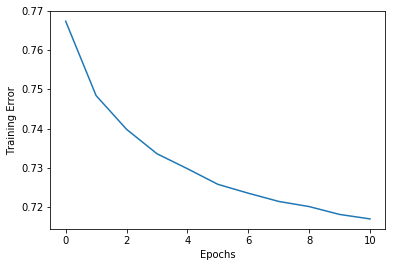

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [25]:
model.evaluate([test.user_id, test.meal_id, test.hotel_id], test.rating)

206293/206293 [==============================] - 8s 37us/step


0.7270639014960169

In [31]:
predictions = model.predict([test.user_id.tail(10), test.meal_id.tail(10), test.hotel_id.tail(10)])
[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[4.2622757] 3
[3.9097912] 5
[3.626099] 5
[4.370604] 5
[4.176558] 3
[3.8289394] 1
[3.890769] 4
[3.928206] 5
[4.4399085] 3
[3.9096348] 3


[None, None, None, None, None, None, None, None, None, None]

In [0]:
meal_em = model.get_layer('meal-Embedding-MLP')
meal_em_weights = meal_em.get_weights()[0]

In [34]:
meal_em_weights[:5]

array([[-0.03622349, -0.02208392,  0.0301753 , -0.0706409 , -0.06883982,
        -0.04696829,  0.0682267 , -0.08833378, -0.0315275 ,  0.11089204],
       [-0.07175091,  0.01273735,  0.0715481 , -0.07718594,  0.00622393,
        -0.0960877 ,  0.05834992,  0.05976543, -0.04730551, -0.05592101],
       [-0.01338527,  0.05839417, -0.06088004, -0.06035481,  0.03049814,
         0.01458356,  0.00712825,  0.02723902, -0.00520548, -0.04542262],
       [ 0.01215399, -0.05482079, -0.06461062,  0.04828808,  0.04561117,
         0.06257466,  0.07865945, -0.05183532,  0.0671437 ,  0.05750996],
       [-0.04961631, -0.10361032, -0.01946922, -0.01191161, -0.06227326,
         0.02472582, -0.03968833,  0.06704702,  0.00477279, -0.02634511]],
      dtype=float32)

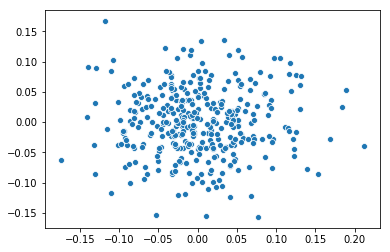

In [35]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
pca_result = pca.fit_transform(meal_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [38]:
import numpy as np
meal_em_weights = meal_em_weights / np.linalg.norm(meal_em_weights, axis = 1).reshape((-1, 1))
meal_em_weights[0][:10]
np.sum(np.square(meal_em_weights[0]))

1.0

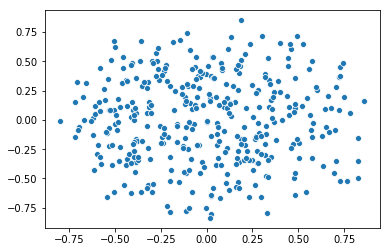

In [39]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(meal_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [40]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(meal_em_weights)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 363 samples in 0.001s...
[t-SNE] Computed neighbors for 363 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 363 / 363
[t-SNE] Mean sigma: 0.467004
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.816143
[t-SNE] KL divergence after 300 iterations: 1.351576


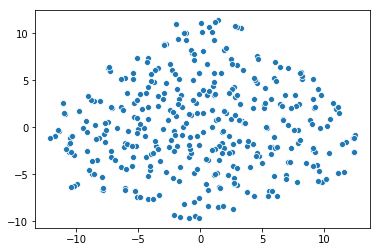

In [41]:
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

In [42]:
food_data = np.array(list(set(ratings.meal_id)))
food_data[:5]

array([0, 1, 2, 3, 4])

In [43]:
user = np.array([1 for i in range(len(food_data))])
user[:5]

array([1, 1, 1, 1, 1])

In [45]:
hotel = np.array([1 for i in range(len(food_data))])
hotel[:5]

array([1, 1, 1, 1, 1])

In [46]:
predictions = model.predict([user, food_data,hotel])
predictions = np.array([a[0] for a in predictions])
recommended_food_ids = (-predictions).argsort()[:5]
recommended_food_ids

array([ 94,  97, 136, 171, 149])

In [47]:
predictions[recommended_food_ids]

array([4.869412 , 4.8657274, 4.7081594, 4.704335 , 4.7041416],
      dtype=float32)